In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [2]:
df = pd.read_csv("current_catalog.csv")
df.head()


,norad_id,name,object_type,satellite_constellation,altitude_km,altitude_category,orbital_band,congestion_risk,inclination,eccentricity,launch_year_estimate,days_in_orbit_estimate,orbit_lifetime_category,mean_motion,epoch,data_source,snapshot_date,country,last_seen
0,900,CALSPHERE 1,PAYLOAD,Other,976.767905,Low LEO,LEO-Polar,LOW,90.2209,0.002762,2023,0,<1yr,13.763762,2025-12-18 12:24:13.823424,celestrak,2025-12-18,US,2025-12-18
1,902,CALSPHERE 2,PAYLOAD,Other,1061.667840,Mid LEO,LEO-Polar,LOW,90.2359,0.001959,2023,0,<1yr,13.528836,2025-12-18 13:41:37.360320,celestrak,2025-12-18,US,2025-12-18
2,1361,LCS 1,PAYLOAD,Other,2787.872979,High LEO,MEO,LOW,32.1394,0.001354,2023,0,<1yr,9.893097,2025-12-18 10:06:51.150240,celestrak,2025-12-18,US,2025-12-18
3,1512,TEMPSAT 1,PAYLOAD,Other,1133.279350,Mid LEO,LEO-Polar,HIGH,89.9874,0.007075,2023,0,<1yr,13.335829,2025-12-18 14:34:09.444864,celestrak,2025-12-18,US,2025-12-18
4,1520,CALSPHERE 4A,PAYLOAD,Other,1123.314476,Mid LEO,LEO-Polar,HIGH,89.9101,0.006837,2023,0,<1yr,13.362410,2025-12-18 14:30:43.945056,celestrak,2025-12-18,US,2025-12-18


In [3]:
df.shape


(13908, 19)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   norad_id                 13908 non-null  int64  
 1   name                     13908 non-null  object 
 2   object_type              13908 non-null  object 
 3   satellite_constellation  13908 non-null  object 
 4   altitude_km              13908 non-null  float64
 5   altitude_category        13908 non-null  object 
 6   orbital_band             13908 non-null  object 
 7   congestion_risk          13908 non-null  object 
 8   inclination              13908 non-null  float64
 9   eccentricity             13908 non-null  float64
 10  launch_year_estimate     13908 non-null  int64  
 11  days_in_orbit_estimate   13908 non-null  int64  
 12  orbit_lifetime_category  13908 non-null  object 
 13  mean_motion              13908 non-null  float64
 14  epoch                 

In [5]:
df.describe()


,norad_id,altitude_km,inclination,eccentricity,launch_year_estimate,days_in_orbit_estimate,mean_motion
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.0,13908.000000,13908.000000
mean,56375.402143,2392.209002,59.143237,0.002787,2023.0,0.063057,14.233581
std,8538.650339,7684.979334,23.536343,0.039378,0.0,0.731213,3.263887
min,900.000000,136.628422,0.000600,0.000006,2023.0,-2.000000,0.283589
25%,52267.750000,475.216879,43.003500,0.000123,2023.0,0.000000,14.983594
50%,58194.500000,539.739122,53.160000,0.000151,2023.0,0.000000,15.088414
75%,63122.250000,571.964978,70.002525,0.000299,2023.0,0.000000,15.301994
max,67222.000000,91482.806905,148.001100,0.877276,2023.0,29.000000,16.510286


In [6]:
df.isnull().sum()


norad_id                   0
name                       0
object_type                0
satellite_constellation    0
altitude_km                0
altitude_category          0
orbital_band               0
congestion_risk            0
inclination                0
eccentricity               0
launch_year_estimate       0
days_in_orbit_estimate     0
orbit_lifetime_category    0
mean_motion                0
epoch                      0
data_source                0
snapshot_date              0
country                    0
last_seen                  0
dtype: int64

In [7]:
features = [
    "altitude_km",
    "inclination",
    "eccentricity",
    "mean_motion",
    "days_in_orbit_estimate",
    "object_type"
]

target = "orbital_band"


In [8]:
df_ml = df[features + [target]].copy()
df_ml.head()


,altitude_km,inclination,eccentricity,mean_motion,days_in_orbit_estimate,object_type,orbital_band
0,976.767905,90.2209,0.002762,13.763762,0,PAYLOAD,LEO-Polar
1,1061.667840,90.2359,0.001959,13.528836,0,PAYLOAD,LEO-Polar
2,2787.872979,32.1394,0.001354,9.893097,0,PAYLOAD,MEO
3,1133.279350,89.9874,0.007075,13.335829,0,PAYLOAD,LEO-Polar
4,1123.314476,89.9101,0.006837,13.362410,0,PAYLOAD,LEO-Polar


In [9]:
# numeric columns
num_cols = df_ml.select_dtypes(include=np.number).columns
df_ml[num_cols] = df_ml[num_cols].fillna(df_ml[num_cols].median())

# categorical columns
df_ml["object_type"] = df_ml["object_type"].fillna("Unknown")


### Encode categorical variables

In [10]:
le_object = LabelEncoder()
df_ml["object_type_encoded"] = le_object.fit_transform(df_ml["object_type"])

le_target = LabelEncoder()
df_ml["orbital_band_encoded"] = le_target.fit_transform(df_ml["orbital_band"])


In [11]:
df_ml.head()


,altitude_km,inclination,eccentricity,mean_motion,days_in_orbit_estimate,object_type,orbital_band,object_type_encoded,orbital_band_encoded
0,976.767905,90.2209,0.002762,13.763762,0,PAYLOAD,LEO-Polar,0,5
1,1061.667840,90.2359,0.001959,13.528836,0,PAYLOAD,LEO-Polar,0,5
2,2787.872979,32.1394,0.001354,9.893097,0,PAYLOAD,MEO,0,7
3,1133.279350,89.9874,0.007075,13.335829,0,PAYLOAD,LEO-Polar,0,5
4,1123.314476,89.9101,0.006837,13.362410,0,PAYLOAD,LEO-Polar,0,5


### Prepare X and y

In [12]:
X = df_ml[
    [
        "altitude_km",
        "inclination",
        "eccentricity",
        "mean_motion",
        "days_in_orbit_estimate",
        "object_type_encoded"
    ]
]

y = df_ml["orbital_band_encoded"]


### Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Feature scaling

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## OBJECTIVE 1: ORBITAL BAND CLASSIFICATION
### Logistic Regression 

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9856218547807333
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        85
           1       0.60      0.21      0.32        14
           2       1.00      0.33      0.50         6
           3       0.99      0.99      0.99       720
           4       0.99      1.00      0.99      1215
           5       1.00      1.00      1.00       683
           6       0.00      0.00      0.00         1
           7       0.84      0.83      0.83        58

    accuracy                           0.99      2782
   macro avg       0.78      0.67      0.69      2782
weighted avg       0.98      0.99      0.98      2782



C:\Users\dell2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### Decision Tree

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9996405463695184
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00       720
           4       1.00      1.00      1.00      1215
           5       1.00      1.00      1.00       683
           6       1.00      1.00      1.00         1
           7       0.98      1.00      0.99        58

    accuracy                           1.00      2782
   macro avg       1.00      1.00      1.00      2782
weighted avg       1.00      1.00      1.00      2782



### Random Forest

In [17]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.998921639108555
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00       720
           4       1.00      1.00      1.00      1215
           5       1.00      1.00      1.00       683
           6       0.00      0.00      0.00         1
           7       0.98      1.00      0.99        58

    accuracy                           1.00      2782
   macro avg       0.87      0.87      0.87      2782
weighted avg       1.00      1.00      1.00      2782



C:\Users\dell2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell2\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### Gradient Boosting

In [18]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9996405463695184
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00       720
           4       1.00      1.00      1.00      1215
           5       1.00      1.00      1.00       683
           6       1.00      1.00      1.00         1
           7       0.98      1.00      0.99        58

    accuracy                           1.00      2782
   macro avg       1.00      1.00      1.00      2782
weighted avg       1.00      1.00      1.00      2782



### Model comparison table

In [19]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.985622
1,Decision Tree,0.999641
2,Random Forest,0.998922
3,Gradient Boosting,0.999641


### Confusion Matrix

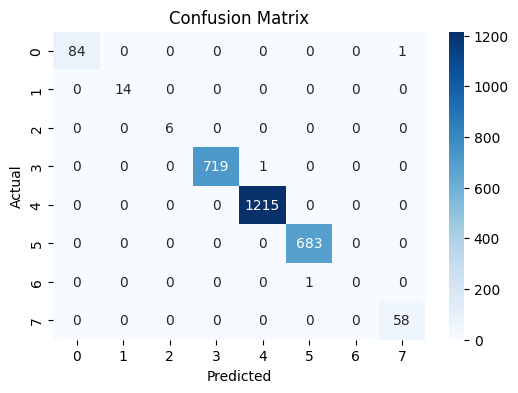

In [20]:
best_pred = y_pred_rf  # change if another model performs better

cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Feature importance (Random Forest)

In [21]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
1,inclination,0.646413
0,altitude_km,0.142061
3,mean_motion,0.137391
2,eccentricity,0.065008
5,object_type_encoded,0.007558
4,days_in_orbit_estimate,0.001570


## Objective 2: Orbital Congestion / Risk Prediction

### Selecting useful orbital features and focusing on collision & congestion related parameters.

In [29]:
features = [
    "MEAN_MOTION",
    "ECCENTRICITY",
    "INCLINATION"
]


In [30]:
df = df[features].dropna()
df.head()


,MEAN_MOTION,ECCENTRICITY,INCLINATION
0,13.763762,0.002762,90.2209
1,13.528836,0.001959,90.2359
2,9.893097,0.001354,32.1394
3,13.335829,0.007075,89.9874
4,13.362410,0.006837,89.9101


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

risk_score = (
    0.5 * np.abs(X_scaled[:, 0]) +   # Mean motion
    0.3 * np.abs(X_scaled[:, 2]) +   # Inclination
    0.2 * np.abs(X_scaled[:, 1])     # Eccentricity
)

df["RISK_SCORE"] = risk_score


In [34]:
features = [
    "MEAN_MOTION",
    "ECCENTRICITY",
    "INCLINATION"
]

df = df[features].dropna()


### Scaling the features

In [35]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


### Creating the ORBITAL RISK SCORE

In [38]:
risk_score = (
    0.5 * np.abs(X_scaled[:, 0]) +   # Mean Motion → congestion
    0.3 * np.abs(X_scaled[:, 2]) +   # Inclination → orbital plane overlap
    0.2 * np.abs(X_scaled[:, 1])     # Eccentricity → instability
)

df["RISK_SCORE"] = risk_score


In [39]:
df.head()


,MEAN_MOTION,ECCENTRICITY,INCLINATION,RISK_SCORE
0,13.763762,0.002762,90.2209,0.468237
1,13.528836,0.001959,90.2359,0.508496
2,9.893097,0.001354,32.1394,1.016439
3,13.335829,0.007075,89.9874,0.552475
4,13.362410,0.006837,89.9101,0.546208


### Convert risk score into categorical labels

In [40]:
df["RISK_LEVEL"] = pd.qcut(
    df["RISK_SCORE"],
    q=3,
    labels=["Low", "Medium", "High"]
)

df["RISK_LEVEL"].value_counts()


RISK_LEVEL
Low       4636
Medium    4636
High      4636
Name: count, dtype: int64

In [41]:
X = df[features]
y = df["RISK_LEVEL"]


### Train–Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Scale again for ML models

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


### Random Forest (strong non-linear model)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


### Gradient Boosting (advanced)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)


### Model Evaluation

In [49]:
from sklearn.metrics import accuracy_score, classification_report


### Accuracy comparison

In [50]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Logistic Regression Accuracy: 0.8795830337886412
Random Forest Accuracy: 0.9953271028037384
Gradient Boosting Accuracy: 0.9935298346513299


In [51]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       927
         Low       1.00      1.00      1.00       927
      Medium       0.99      0.99      0.99       928

    accuracy                           1.00      2782
   macro avg       1.00      1.00      1.00      2782
weighted avg       1.00      1.00      1.00      2782



### Confusion Matrix

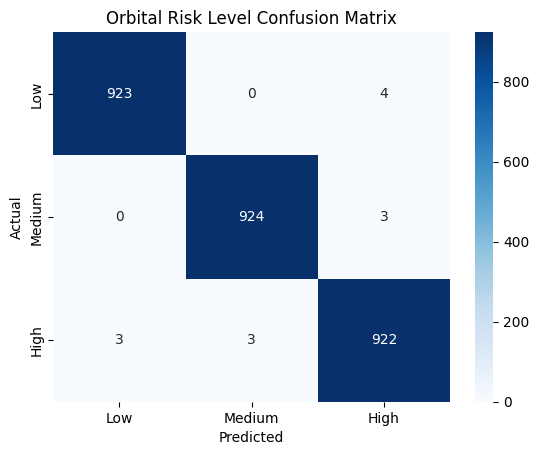

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Orbital Risk Level Confusion Matrix")
plt.show()


### Feature Importance

In [53]:
importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
2,INCLINATION,0.509979
0,MEAN_MOTION,0.358912
1,ECCENTRICITY,0.131109


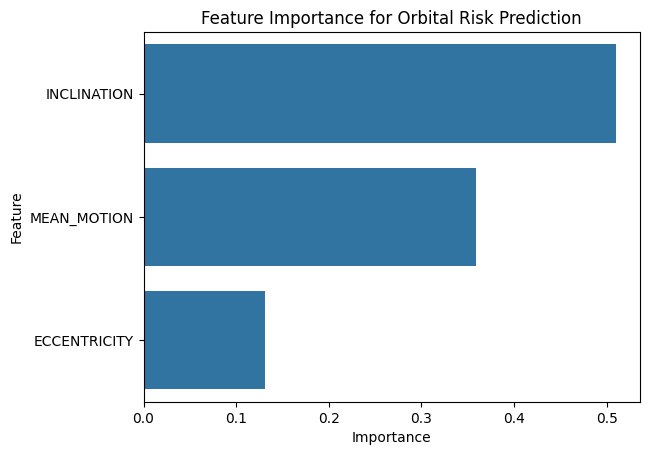

In [54]:
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df
)
plt.title("Feature Importance for Orbital Risk Prediction")
plt.show()
